# Homework 3 - K. V. V. Krishna Teja 

# Part - 1

### Image classification probelm on CIFAR-10 dataset (Original)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import multiprocessing as mp
import pathos.multiprocessing as pmp # -pip install pathos (if not on machine)
print("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.1.0


In [2]:
import tarfile
import pickle
import random
import dill # -pip install dill (if not on machine)
import os
from os.path import isfile, isdir
from tqdm.auto import tqdm
from tensorflow.keras.utils import to_categorical

cifar10_path = 'cifar-10-batches-py'

#if not isdir(cifar10_df):
#    with tarfile.open('cifar-10-python.tar.gz') as tar:
#        tar.extractall()
#        tar.close()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

batch_id = '1'

infile = open(cifar10_path + '/data_batch_' + str(batch_id), mode='rb')
batch = pickle.load(infile, encoding='latin1')

s_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
s_labels = batch['labels']

print('Loading CIFAR-10 data')
infile = open(cifar10_path + '/data_batch_1', mode='rb')
batch = pickle.load(infile, encoding='latin1')
df1 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
lb1 = np.array(batch['labels'])

infile = open(cifar10_path + '/data_batch_2', mode='rb')
batch = pickle.load(infile, encoding='latin1')
df2 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
lb2 = np.array(batch['labels'])

infile = open(cifar10_path + '/data_batch_3', mode='rb')
batch = pickle.load(infile, encoding='latin1')
df3 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
lb3 = np.array(batch['labels'])

infile = open(cifar10_path + '/data_batch_4', mode='rb')
batch = pickle.load(infile, encoding='latin1')
df4 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
lb4 = np.array(batch['labels'])

infile = open(cifar10_path + '/data_batch_5', mode='rb')
batch = pickle.load(infile, encoding='latin1')
df5 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
lb5 = np.array(batch['labels'])

features = np.concatenate([df1,df2,df3,df4,df5], axis=0)
labels = np.concatenate([lb1,lb2,lb3,lb4,lb5], axis=0)

for i in tqdm(features, desc='features'):
    pass
for i in tqdm(labels, desc='labels'):
    pass

Loading CIFAR-10 data



This is from batch #1:
Batch #1 has 50000 Samples 


Unpickling Image_ID #7000:
Label_ID: 5 Name: dog


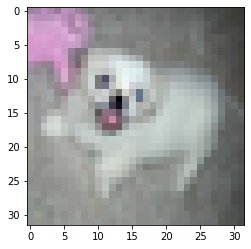

In [3]:
print('\nThis is from batch #{}:'.format(batch_id))
print('Batch #{} has {} Samples \n'.format(batch_id, len(features)))

#Select the desired sample_id to view the unpickled image of... CHOOSE HERE
sample_id = 7000

sample_image = s_features[sample_id]
sample_label = s_labels[sample_id]

print('\nUnpickling Image_ID #{}:'.format(sample_id))
#print('Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
#print('Shape: {}'.format(sample_image.shape))
print('Label_ID: {} Name: {}'.format(sample_label, label_names[sample_label]))

plt.imshow(sample_image)

In [4]:
## Remove previous weights, bias, inputs, etc..
#tf.reset_default_graph()
tf.keras.backend.clear_session()

## Inputs
#x = tf.compat.v1.placeholder(tf.float32, shape=(None, 32, 32, 3), name='input_x')
#y =  tf.compat.v1.placeholder(tf.float32, shape=(None, 10), name='output_y')
#keep_prob = tf.compat.v1.placeholder(tf.float32, name='keep_prob')

trainx = np.array(features)
trainy = np.array(labels)

print('Loading CIFAR-10 test_batch...')

infile = open(cifar10_path + '/test_batch', mode='rb')
valid = pickle.load(infile, encoding='latin1')

testx = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
testy = np.array(batch['labels'])

for i in tqdm(valid['labels'], desc='test'):
    pass

Loading CIFAR-10 test_batch...


In [5]:
#trainx.shape, trainy.shape, testx.shape, testy.shape

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3118656252889828541
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4849834393
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3548971626860337624
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import OneHotEncoder

with tf.device('/GPU:0'): # Choose /CPU:0 or /GPU:0 depending on load...
    print('RGB color experiment running on GPU...')
    weight_decay = 1e-3
    # Visit https://keras.io/initializers/#initializer for more options on initializers
    model = Sequential()  
    model.add(Conv2D(64, kernel_size=5, strides=(2, 2), activation='relu', input_shape=(32,32,3),
                         kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(64, kernel_size=5, strides=(2, 2), activation='relu',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(384, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dense(192, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.3))
    
    model.add(Dense(10, activation='softmax'))

    custom_optm = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=custom_optm, metrics=['accuracy'])

    history = model.fit(trainx, trainy,
                            batch_size=64,
                            epochs=100,
                            validation_data=(testx, testy),
                            use_multiprocessing=False)
        
    scores = model.evaluate(testx, testy, verbose=1)
    print('\nClassification loss on the test set:', scores[0])
    print('Classification accuracy on the test set:', scores[1]*100)

RGB color experiment running on GPU...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - ETA: 39:03 - loss: 3.4016 - accuracy: 0.093 - ETA: 5:38 - loss: 2.7393 - accuracy: 0.142 - ETA: 2:28 - loss: 2.5934 - accuracy: 0.17 - ETA: 1:28 - loss: 2.4397 - accuracy: 0.19 - ETA: 1:04 - loss: 2.3601 - accuracy: 0.21 - ETA: 47s - loss: 2.2924 - accuracy: 0.2272 - ETA: 40s - loss: 2.2468 - accuracy: 0.240 - ETA: 35s - loss: 2.2252 - accuracy: 0.246 - ETA: 32s - loss: 2.2113 - accuracy: 0.249 - ETA: 29s - loss: 2.1960 - accuracy: 0.250 - ETA: 27s - loss: 2.1835 - accuracy: 0.254 - ETA: 25s - loss: 2.1617 - accuracy: 0.261 - ETA: 22s - loss: 2.1436 - accuracy: 0.266 - ETA: 20s - loss: 2.1266 - accuracy: 0.273 - ETA: 18s - loss: 2.1095 - accuracy: 0.277 - ETA: 17s - loss: 2.0982 - accuracy: 0.281 - ETA: 16s - loss: 2.0823 - accuracy: 0.286 - ETA: 15s - loss: 2.0718 - accuracy: 0.287 - ETA: 14s - loss: 2.0583 - accuracy: 0.290 - ETA: 13s - l

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

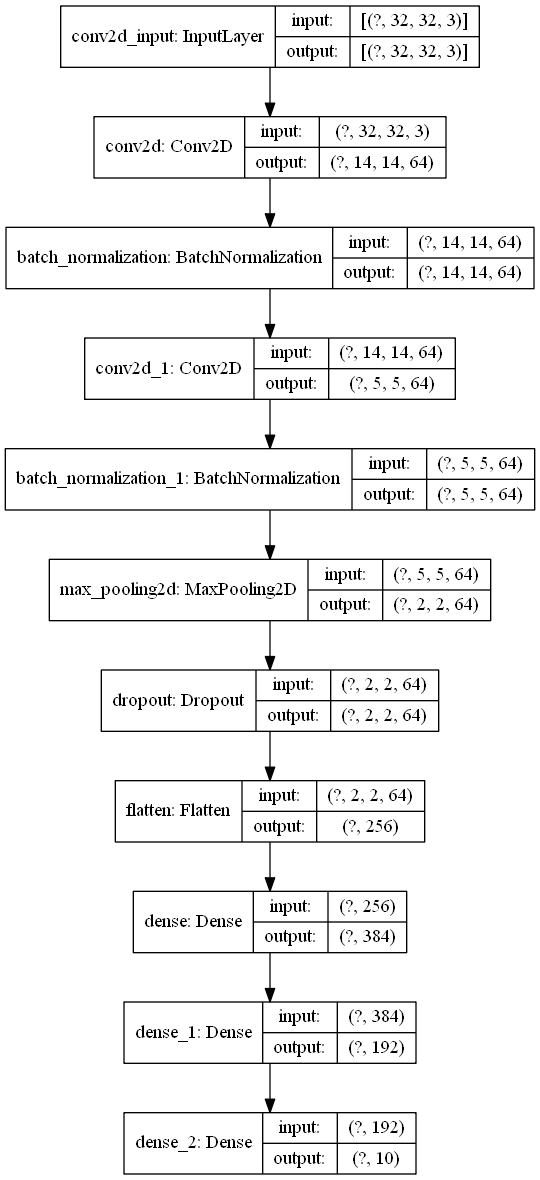

In [9]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

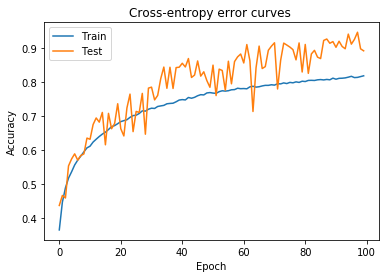

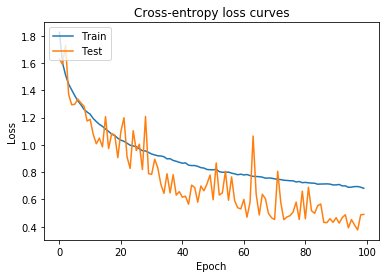

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Cross-entropy error curves ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross-entropy loss curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Coefficients of first 5 filters of 1st Layer: 
 [[-0.00781367 -0.01567137 -0.07473651  0.02484291 -0.01285662]
 [ 0.04122711 -0.00235872 -0.05543276 -0.06501468  0.08032174]
 [ 0.01476248  0.16642253 -0.06507976 -0.191029   -0.11511556]
 [ 0.01445226  0.18243873  0.23762803 -0.2024819  -0.42611063]
 [ 0.04464353  0.25032923  0.17717645 -0.02287406 -0.15595432]]


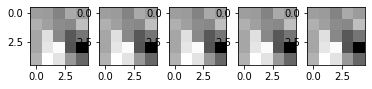

Coefficients of first 5 filters of 2nd Layer: 
 [[ 2.86025106e-33  6.60958846e-34 -2.44440634e-33  9.52424645e-34
  -8.93879516e-34]
 [-1.47729472e-33 -3.36951011e-33  1.13150285e-33  9.11163875e-34
   1.06566415e-33]
 [ 3.24083517e-34 -3.92065863e-33  3.35354359e-33  2.98981900e-33
   7.59517022e-34]
 [ 2.89257091e-33  2.28565858e-33 -2.97543242e-33 -7.69027828e-34
  -1.50635569e-33]
 [ 1.13913760e-33  3.68171856e-34  3.52207201e-33  2.82258624e-34
   1.04669479e-33]]


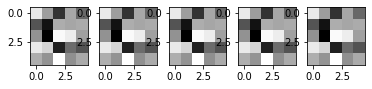

In [11]:
x1w=model.get_weights()[0][:,:,:,0][:,:,0]
print('Coefficients of first 5 filters of 1st Layer: \n', x1w)

for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(x1w[:,:],interpolation="nearest",cmap="gray")
plt.show()

x2w=model.get_weights()[0][:,:,:,2][:,:,0]
print('Coefficients of first 5 filters of 2nd Layer: \n', x2w)

for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(x2w[:,:],interpolation="nearest",cmap="gray")
plt.show()

In [12]:
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (5, 5, 3, 64)
conv2d_1 (5, 5, 64, 64)


### Conv2D

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
For 128x128 RGB pictures, we provide the keyword argument input_shape=(128, 128, 3) as the first layer in a model.

### CNN - Syntax

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
                    dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform',
                    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
                    activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

### MaxPooling - Syntax

keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

### Early stopping - Syntax

keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

# Part - 2

### CIFAR-10 Image classification in grayscale

In [13]:
import matplotlib.image as mpimg

def grayscale(data,dtype='float32'):
    r, g,b=np.asarray(.3,dtype=dtype),np.asarray(.59,dtype=dtype),np.asarray(.11,dtype=dtype)
    rst=r*data[:,:,:,0]+g*data[:,:,:,1]+b*data[:,:,:,2]
    rst=np.expand_dims(rst,axis=3)
    return rst

x_train_gray=grayscale(trainx)
x_test_gray=grayscale(testx)

for i in tqdm(labels, desc='Loading grayscale'):
    pass

In [14]:
with tf.device('/GPU:0'): # Choose /CPU:0 or /GPU:0 depending on load...
    print('\nGrayscale experiment running on GPU...')
    weight_decay = 1e-3
    # Visit https://keras.io/initializers/#initializer for more options on initializers
    model2 = Sequential()  
    model2.add(Conv2D(64, kernel_size=5, strides=(2, 2), activation='relu', input_shape=(32,32,1),
                         kernel_regularizer=regularizers.l2(weight_decay)))
    model2.add(BatchNormalization())
    #model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model2.add(Conv2D(64, kernel_size=5, strides=(2, 2), activation='relu',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model2.add(Dropout(0.25))
    model2.add(Flatten())
    
    model2.add(Dense(384, activation='relu'))
    #model2.add(BatchNormalization())
    model2.add(Dense(192, activation='relu'))
    #model2.add(BatchNormalization())
    #model2.add(Dropout(0.3))

    model2.add(Dense(10, activation='softmax'))

    custom_optm = tf.keras.optimizers.Adam(learning_rate=0.001)

    model2.compile(loss='sparse_categorical_crossentropy', optimizer=custom_optm, metrics=['accuracy'])

    history2 = model2.fit(x_train_gray, trainy,
                            batch_size=64,
                            epochs=100,
                            validation_data=(x_test_gray, testy),
                            use_multiprocessing=False)

    #model2.fit(trainx, trainy, epochs=100, batch_size=100, verbose=0 )
    scores = model2.evaluate(x_test_gray, testy, verbose=2)
    print('\nClassification loss on the test set:', scores[0])
    print('Classification accuracy on the test set:', scores[1]*100)


Grayscale experiment running on GPU...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - ETA: 9:16 - loss: 3.0901 - accuracy: 0.14 - ETA: 58s - loss: 2.5183 - accuracy: 0.1750 - ETA: 32s - loss: 2.4193 - accuracy: 0.186 - ETA: 23s - loss: 2.3461 - accuracy: 0.204 - ETA: 17s - loss: 2.2826 - accuracy: 0.217 - ETA: 14s - loss: 2.2478 - accuracy: 0.228 - ETA: 12s - loss: 2.2172 - accuracy: 0.235 - ETA: 10s - loss: 2.1766 - accuracy: 0.246 - ETA: 9s - loss: 2.1523 - accuracy: 0.256 - ETA: 8s - loss: 2.1280 - accuracy: 0.26 - ETA: 8s - loss: 2.1134 - accuracy: 0.26 - ETA: 7s - loss: 2.0926 - accuracy: 0.27 - ETA: 7s - loss: 2.0818 - accuracy: 0.27 - ETA: 6s - loss: 2.0698 - accuracy: 0.28 - ETA: 6s - loss: 2.0577 - accuracy: 0.28 - ETA: 6s - loss: 2.0458 - accuracy: 0.29 - ETA: 5s - loss: 2.0369 - accuracy: 0.29 - ETA: 5s - loss: 2.0266 - accuracy: 0.29 - ETA: 5s - loss: 2.0153 - accuracy: 0.29 - ETA: 5s - loss: 2.0116 - accuracy: 

In [15]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          102464    
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

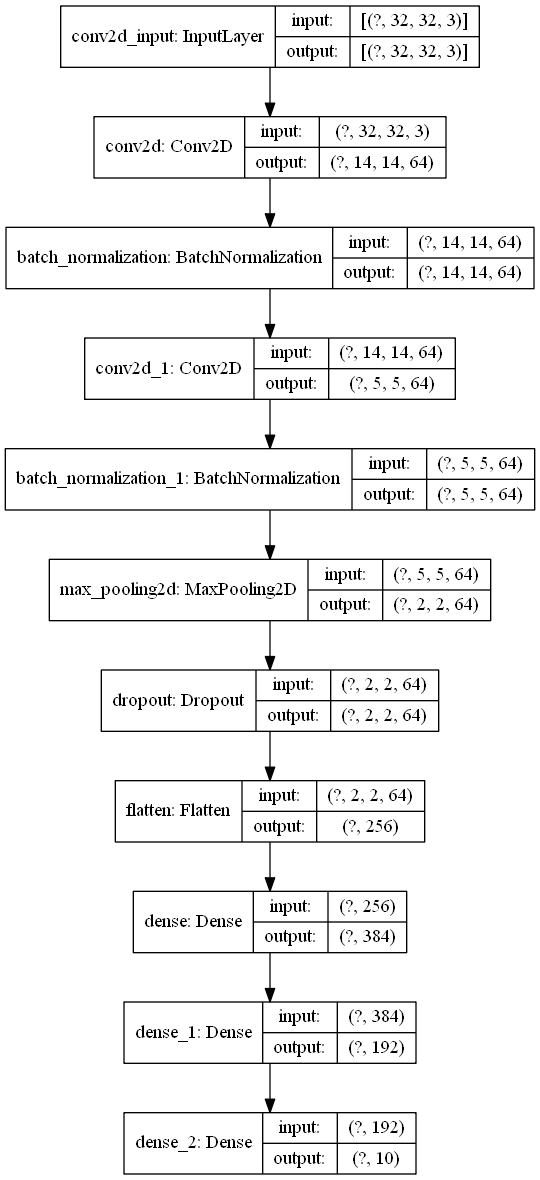

In [16]:
plot_model(model, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

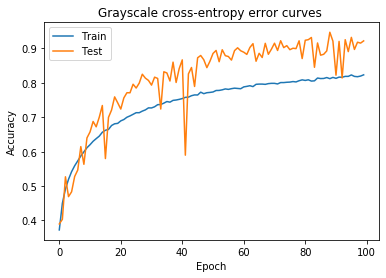

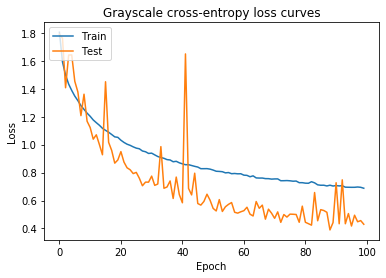

In [17]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Grayscale cross-entropy error curves ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Grayscale cross-entropy loss curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Coefficients of first 5 filters of 1st Layer: 
 [[-0.02969802 -0.41024536 -0.47526765 -0.12847699  0.03828476]
 [ 0.11073473  0.4266555   0.48115775  0.17969646 -0.03056899]
 [-0.06749937 -0.07558382  0.01537634  0.0363731  -0.08580376]
 [ 0.07381639  0.03606618 -0.03028553 -0.0130681  -0.02645384]
 [-0.00217312 -0.05569036  0.00345354 -0.02439928 -0.00317283]]


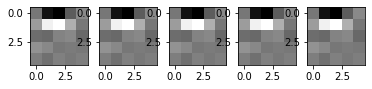

Coefficients of first 5 filters of 2nd Layer: 
 [[-0.01107098  0.04944783 -0.0101259   0.01269372 -0.00237641]
 [-0.01891006  0.0215938  -0.10154769  0.13954629 -0.04611152]
 [-0.01962198 -0.32213318  0.54186356 -0.22765622  0.00148148]
 [-0.03156897  0.45448646 -0.6467863   0.14313523  0.08056974]
 [ 0.06874508 -0.2183382   0.21262527 -0.03698158 -0.04613407]]


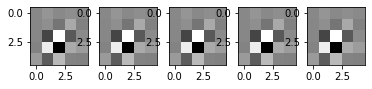

In [18]:
x1w=model2.get_weights()[0][:,:,:,0][:,:,0]
print('Coefficients of first 5 filters of 1st Layer: \n', x1w)

for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(x1w[:,:],interpolation="nearest",cmap="gray")
plt.show()

x2w=model2.get_weights()[0][:,:,:,2][:,:,0]
print('Coefficients of first 5 filters of 2nd Layer: \n', x2w)

for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(x2w[:,:],interpolation="nearest",cmap="gray")
plt.show()

In [19]:
for layer in model2.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_2 (5, 5, 1, 64)
conv2d_3 (5, 5, 64, 64)


In [20]:
#plt.imshow(x_train_grey[2])